# Clase 04 - Visualizaciones personalizadas

Profesor: **Fernando Becerra**, f.becerra@udd.cl, www.fernandobecerra.com

Esta clase nos dedicaremos a ver ejemplos de cómo ocupar las herramientas aprendidas hasta el momento para imitar buenos ejemplos de visualizaciones. Partiremos por tratar de hacer un gráfico de barras que sea más fácil de entender y que comunique mejor nuestro mensaje


## Ejemplo 1: Personas inscritas en partidos políticos por sexo

In [2]:
from IPython.display import Image
import os

In [3]:
os.getcwd()

'd:\\OneDrive - udd.cl\\Magister Data Science UDD\\VISUALIZACIÓN DE LA INFORMACIÓN\\infovis-MDS_UDD\\notebooks'

In [4]:
os.chdir("D:/OneDrive - udd.cl/Magister Data Science UDD/VISUALIZACIÓN DE LA INFORMACIÓN/curso-infovis-python/2024/notebooks")
os.getcwd()

'D:\\OneDrive - udd.cl\\Magister Data Science UDD\\VISUALIZACIÓN DE LA INFORMACIÓN\\curso-infovis-python\\2024\\notebooks'

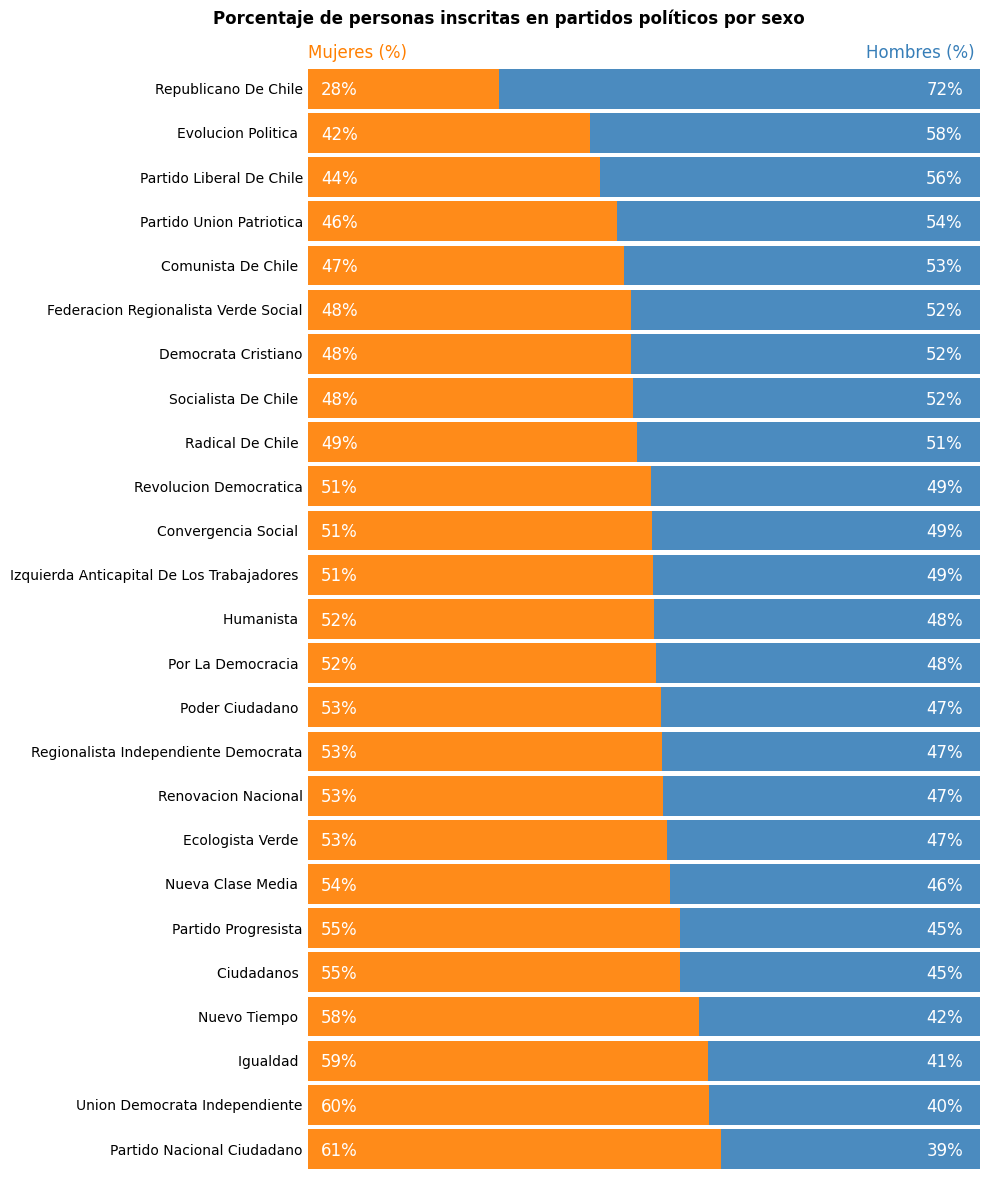

In [5]:
Image(os.getcwd() + '/images/04-1-partidos_politicos_por_sexo.png')

Primero hay que pensar un poco como vamos a hacer el gráfico. La idea aquí es deconstruirlo en elementos gráficos para después ir paso a paso añadiendo o modificándolos


Comencemos importando los tipicos paquetes y leyendo los datos para nuestro gráfico.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path = '../../datos/afiliados_partidos_politicos.csv'
df = pd.read_csv(path)
df.head()

,Partido,Mujeres,Hombres
0,CIUDADANOS,10712,8612
1,COMUNISTA DE CHILE,39748,44754
2,CONVERGENCIA SOCIAL,2076,1981
3,DEMOCRATA CRISTIANO,51803,55809
4,ECOLOGISTA VERDE,8771,7641


Ahora hay que hacer un poco de procesamiento de datos. Como el gráfico nos pide porcentajes y nosotros solo tenemos los números, hay que calcularlos. 

In [8]:
df['Partido'] = df['Partido'].str.title()
df['Total'] = df['Mujeres'] + df['Hombres']
df['Mujeres (%)'] = df['Mujeres'] / df['Total'] * 100
df['Hombres (%)'] = df['Hombres'] / df['Total'] * 100
df.set_index('Partido', inplace=True)
df.head()

,Mujeres,Hombres,Total,Mujeres (%),Hombres (%)
Partido,,,,,
Ciudadanos,10712,8612,19324,55.433658,44.566342
Comunista De Chile,39748,44754,84502,47.037940,52.962060
Convergencia Social,2076,1981,4057,51.170816,48.829184
Democrata Cristiano,51803,55809,107612,48.138683,51.861317
Ecologista Verde,8771,7641,16412,53.442603,46.557397


Comenzamos por hacer un gráfico básico de barras

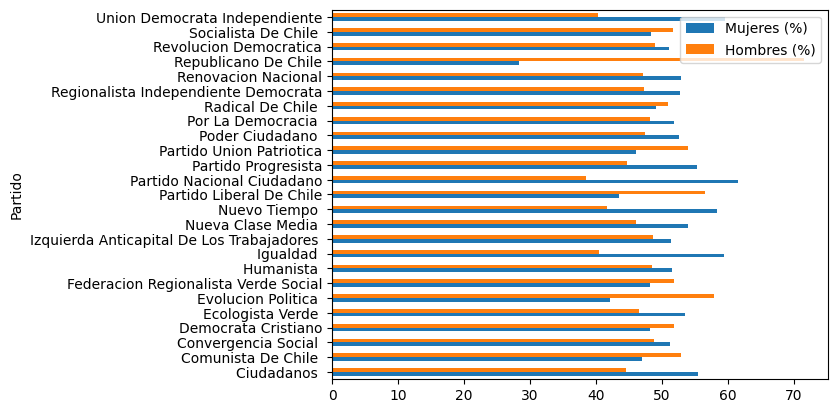

In [9]:
percents = ['Mujeres (%)', 'Hombres (%)']
ax = df[percents].plot.barh()

Usemos una variante conocida como "stack" para poner una barra sobre la otra (o al lado de otra en este caso)



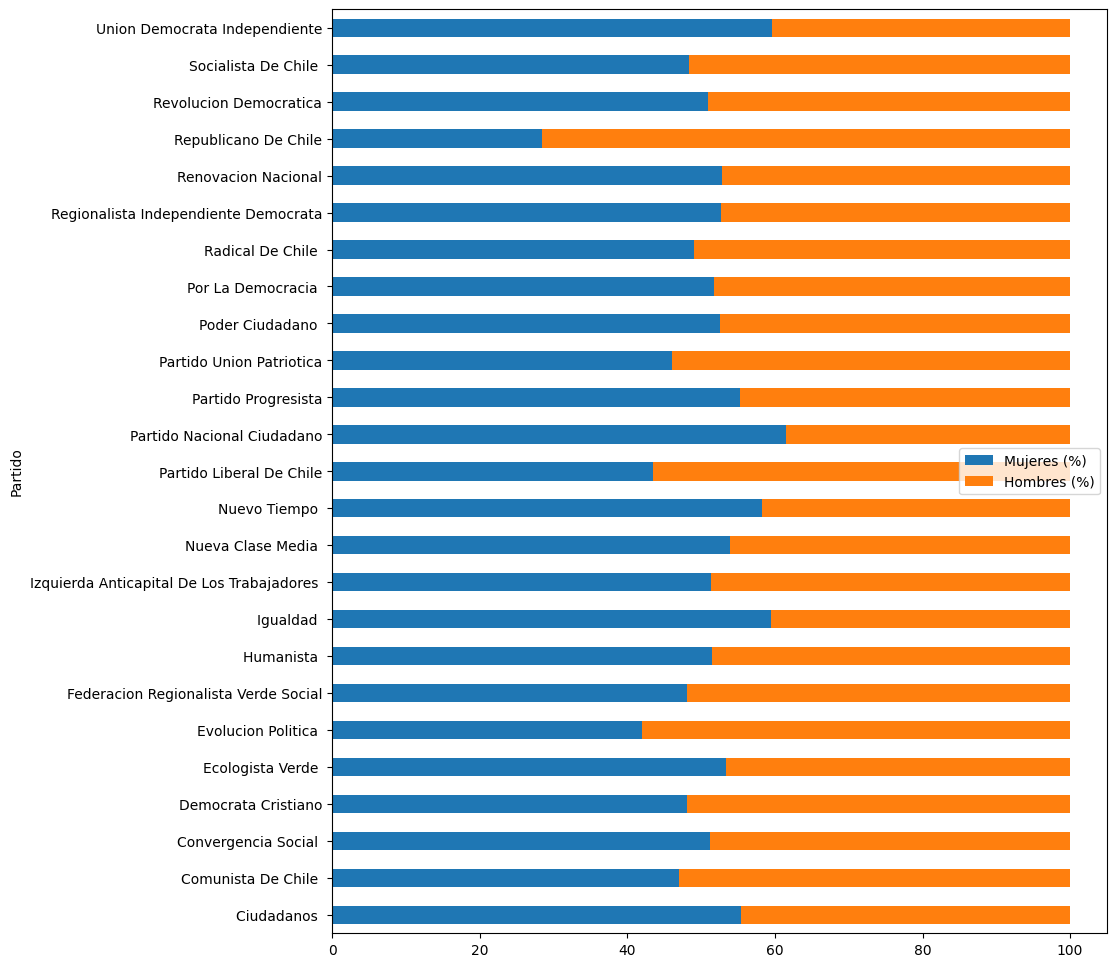

In [10]:
ax = df[percents].plot.barh(stacked=True, figsize=(10,12))

¿Qué cosas se pueden mejorar de esta visualización? El ancho de las barras, la ubicación de la leyenda, limpiar los nombres de los ejes, y otras cosas más. Iremos paso a paso y partiremos por arreglar el ancho de las barras, los límites del eje y, y la leyenda.

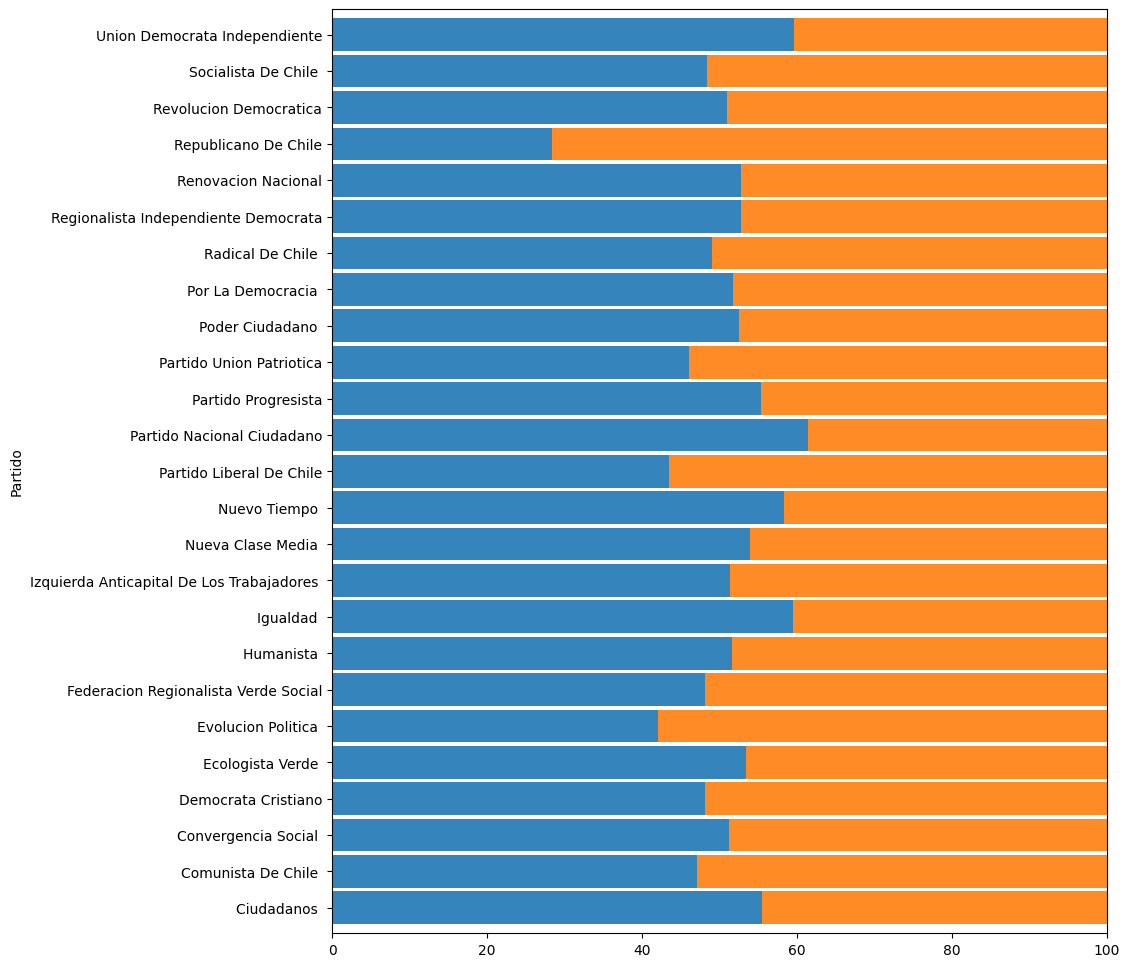

In [11]:
ax = df[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100))

Para que se vea mejor, ordenaremos los datos en base al porcentaje de mujeres inscritas en cada partido. Ahora ya estamos haciendo elecciones conscientes de qué y cómo visualizar nuestros datos para comunicar un mensaje.

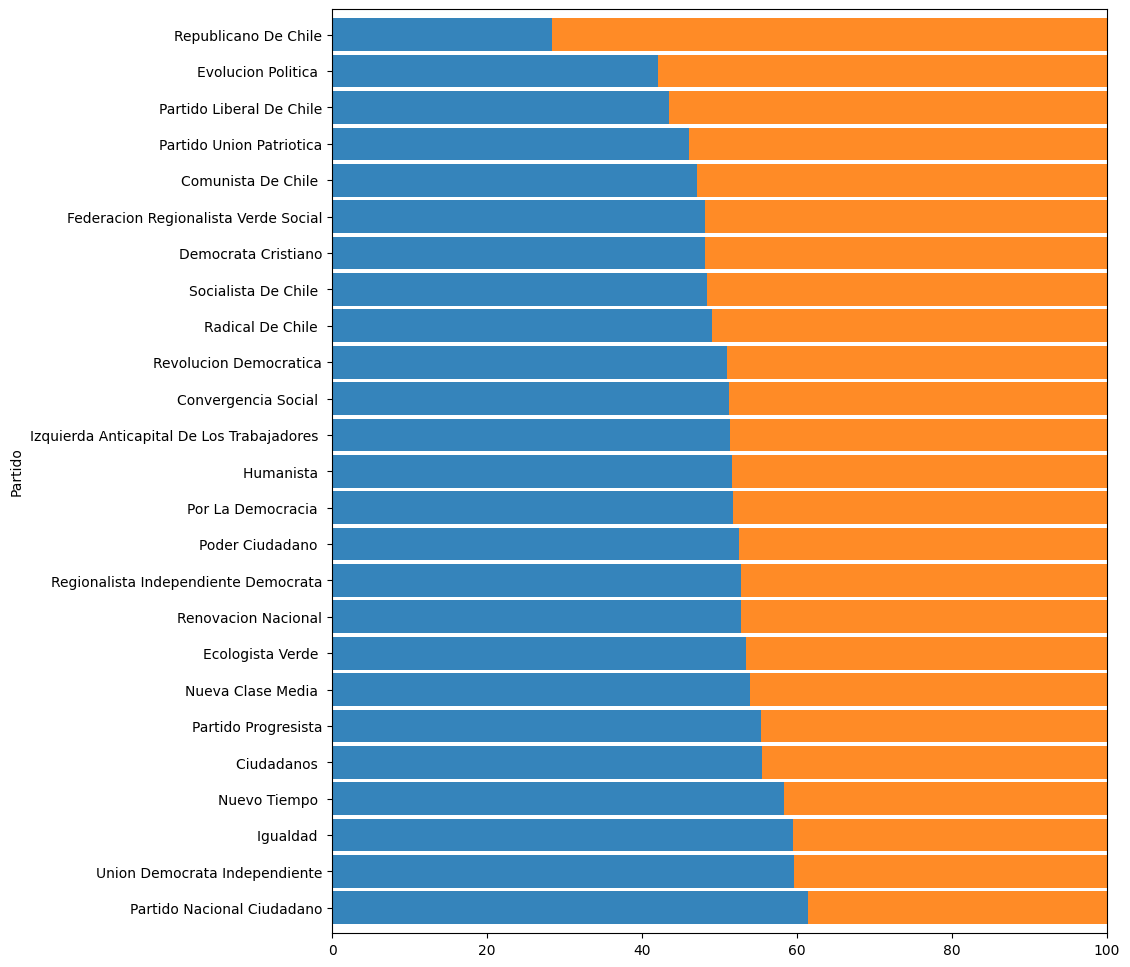

In [12]:
df_sorted = df[percents].sort_values(by='Mujeres (%)', ascending=False)
ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100))

Ahora eliminemos los bordes de la caja que no agregan nada

In [13]:
def hide_border(ax):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

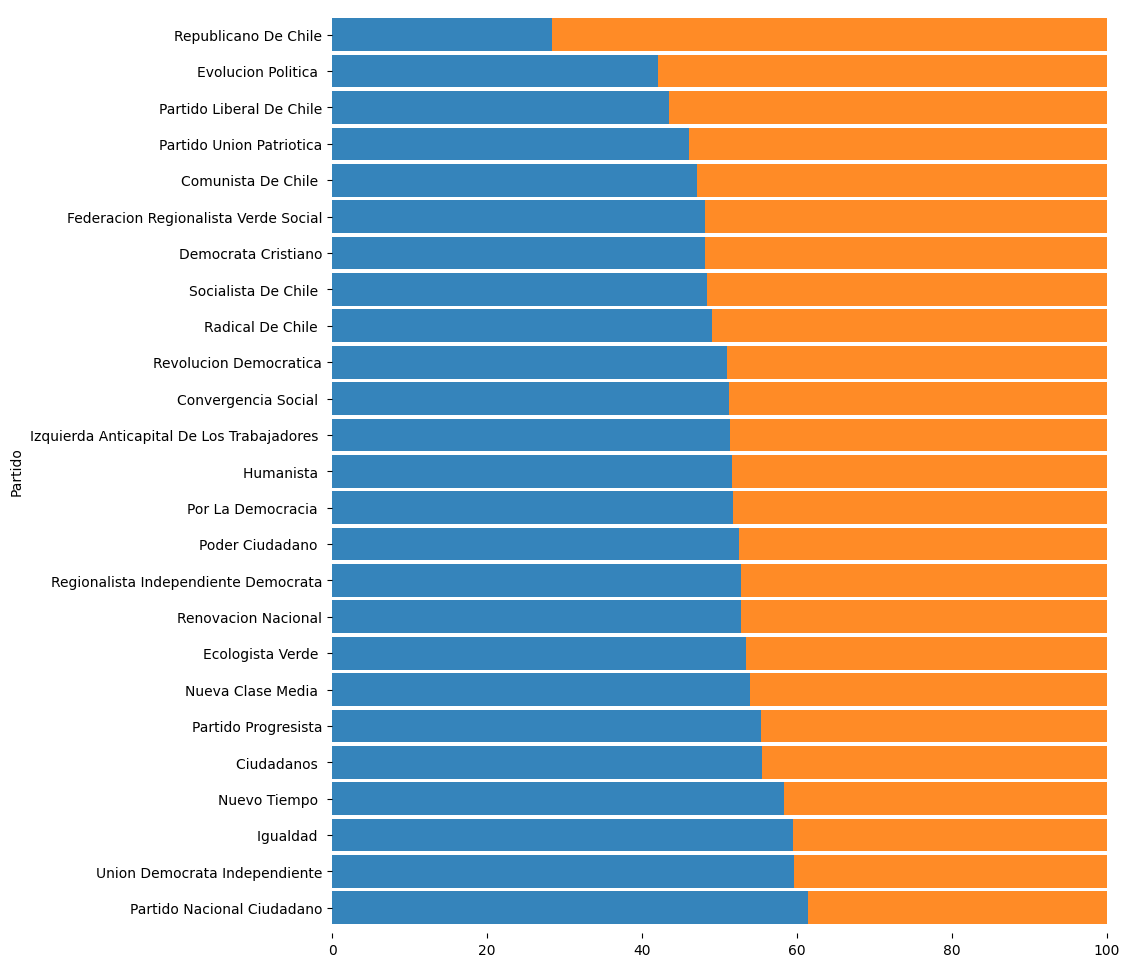

In [14]:
ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)

Lo mismo con las marcas de los ejes

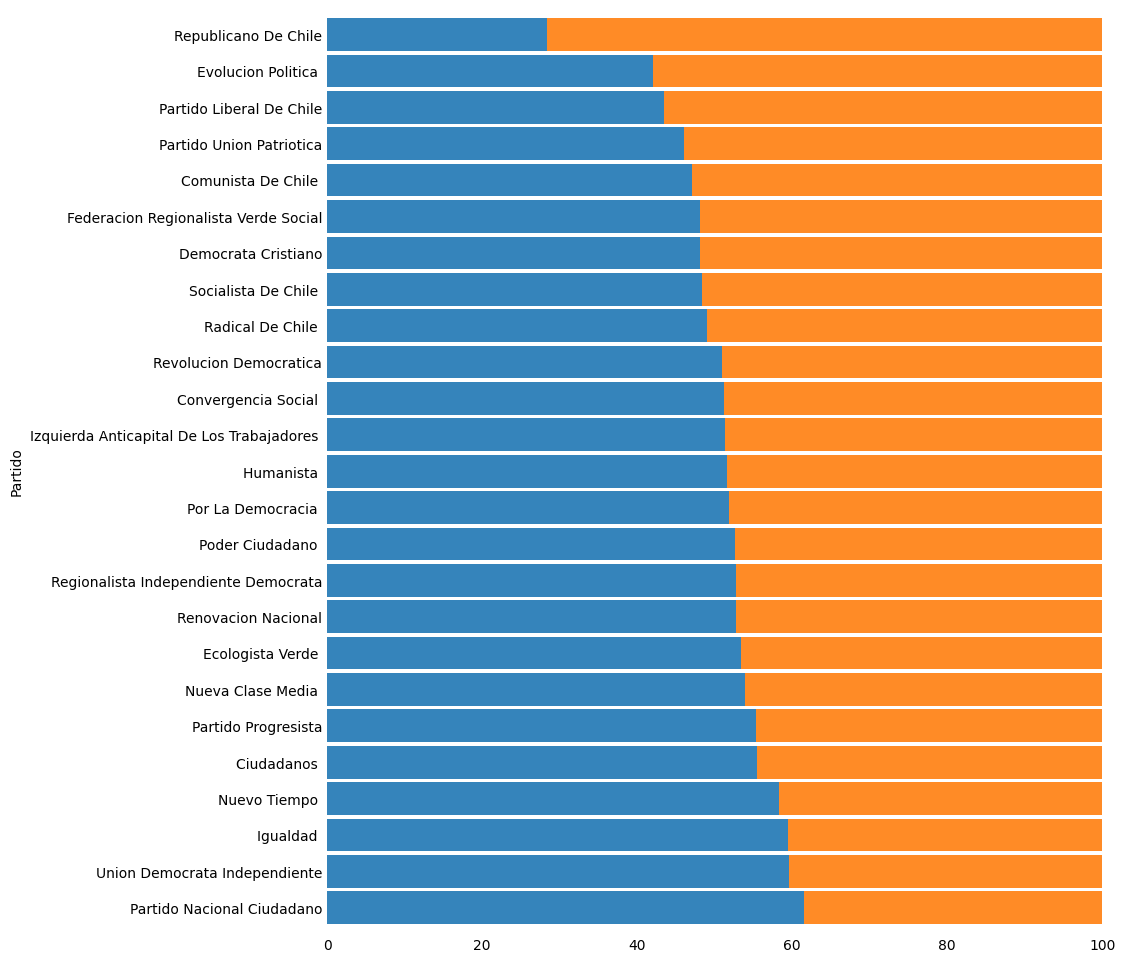

In [15]:
ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)

Borramos el nombre del eje y que no ayuda mucho, pero agregamos esa información en el título del gráfico para que no se pierda

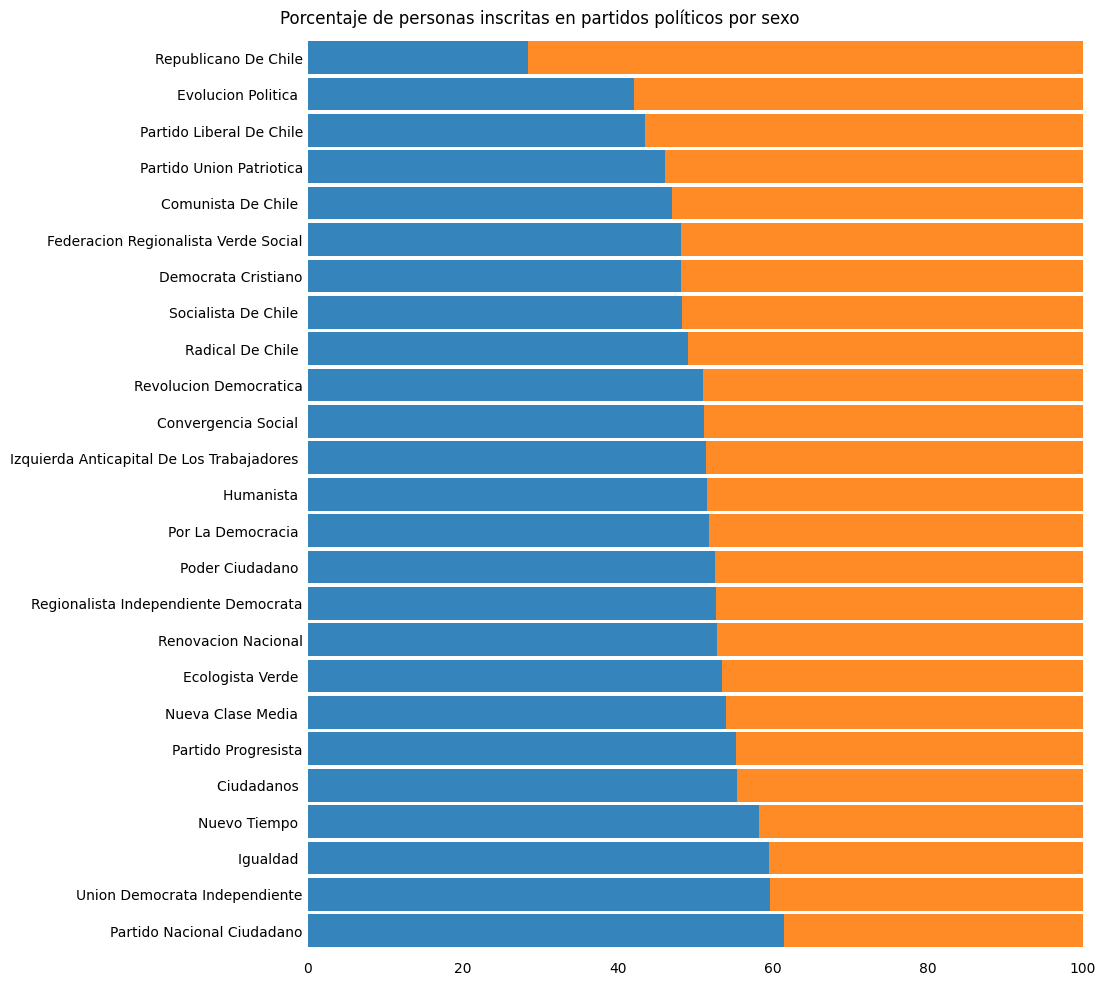

In [16]:
ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo")
ax.title.set_position([.3, 1.03])

Agregamos unos textos para indicar qué es lo que estamos gráficando. Esto viene a reemplazar la leyenda que ya borramos.

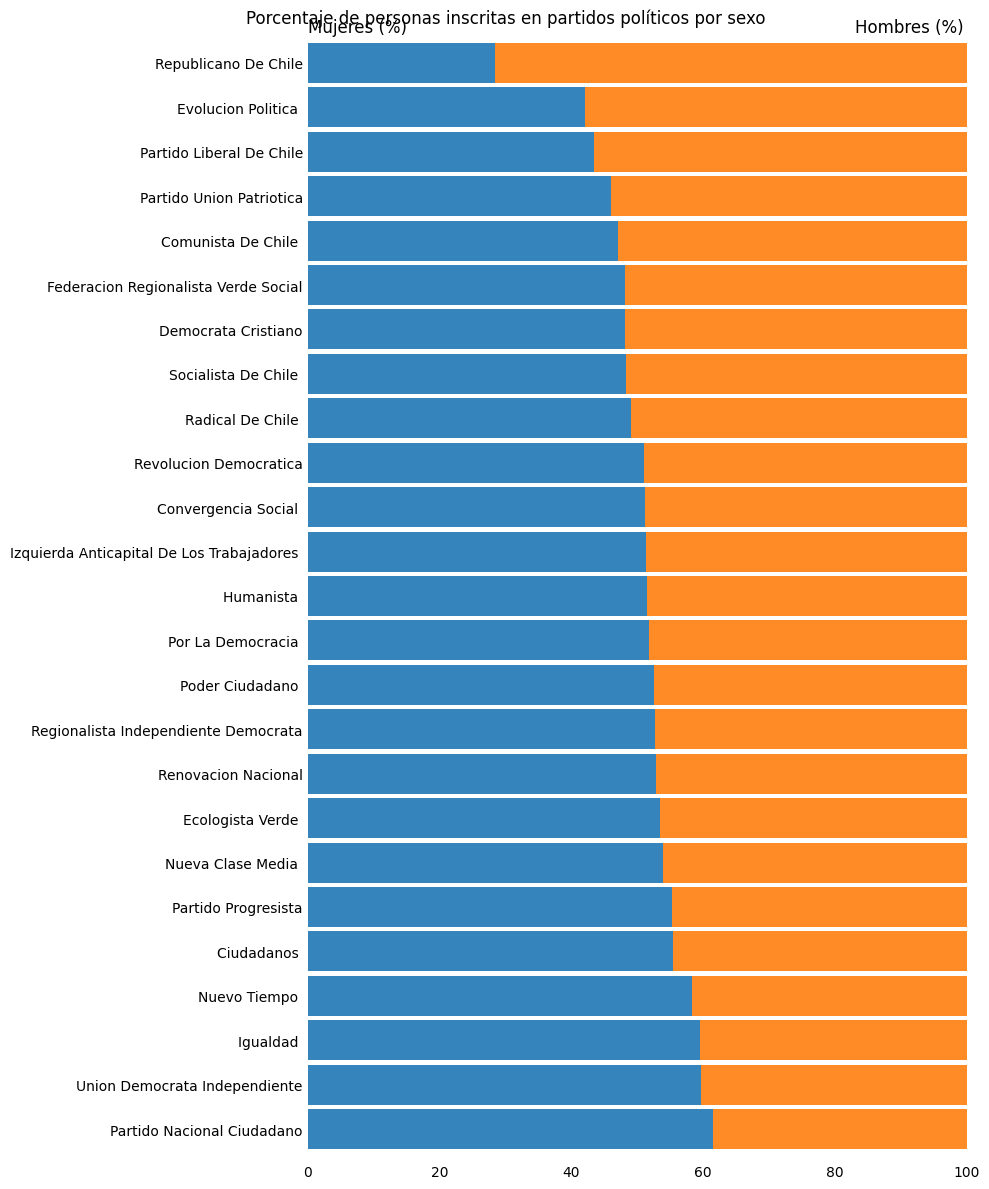

In [17]:
fontsize=12

ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo")
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=fontsize)
ax.text(83, df_sorted.shape[0]-0.3, percents[1], fontsize=fontsize)

plt.tight_layout()
plt.show()

Agregamos espacio al título

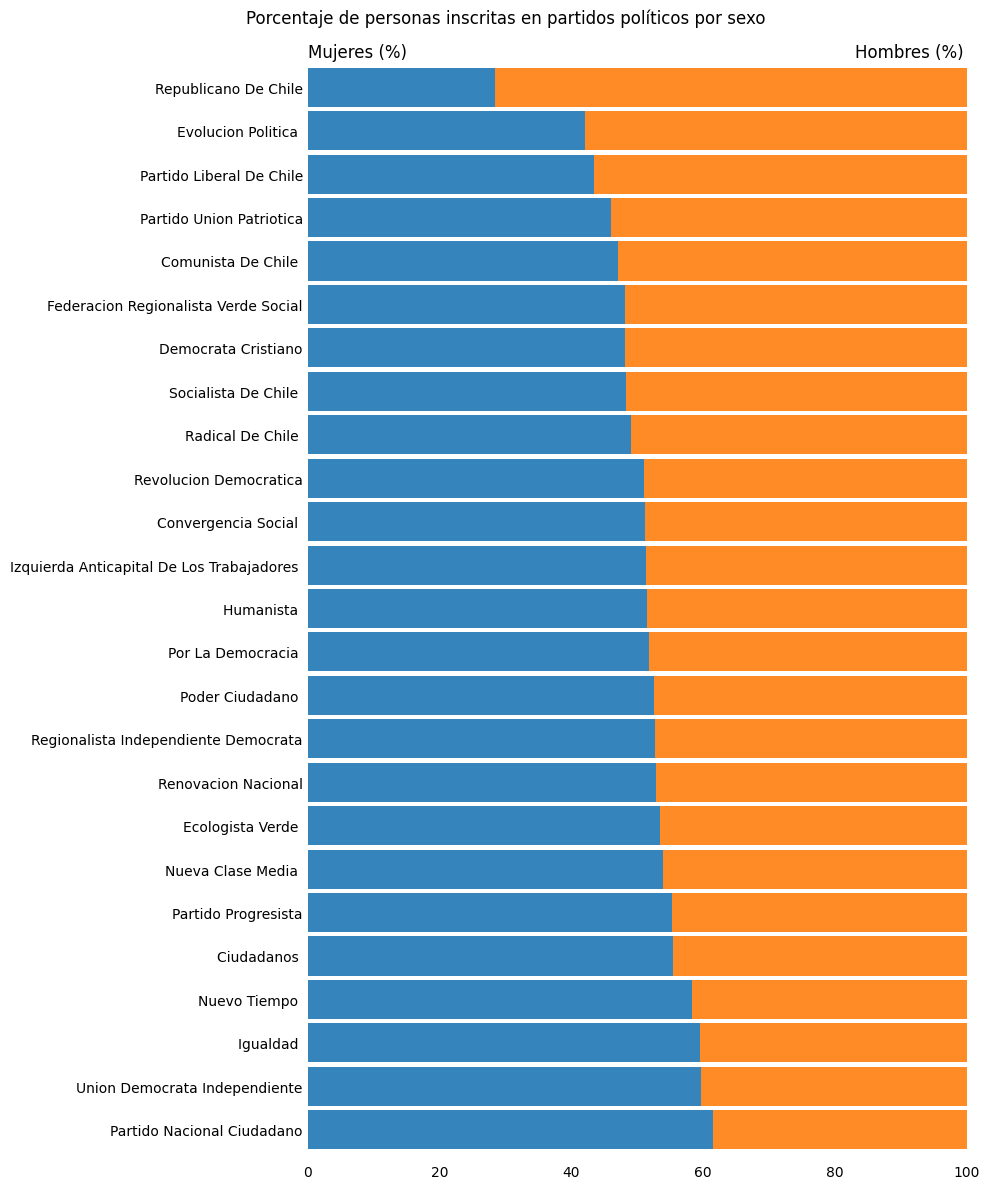

In [18]:
fontsize=12

ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=fontsize)
ax.text(83, df_sorted.shape[0]-0.3, percents[1], fontsize=fontsize)

plt.tight_layout()
plt.show()

De momeno hemos ocupado los colores que matplotlib usa por defecto, pero ¿cuál es el problema con eso? Es mejor hacer una elección consciente de qué color ocuparemos y para qué, de esta forma también nos permite hacer conexiones entre, por ejemplo, las barras y la leyenda.

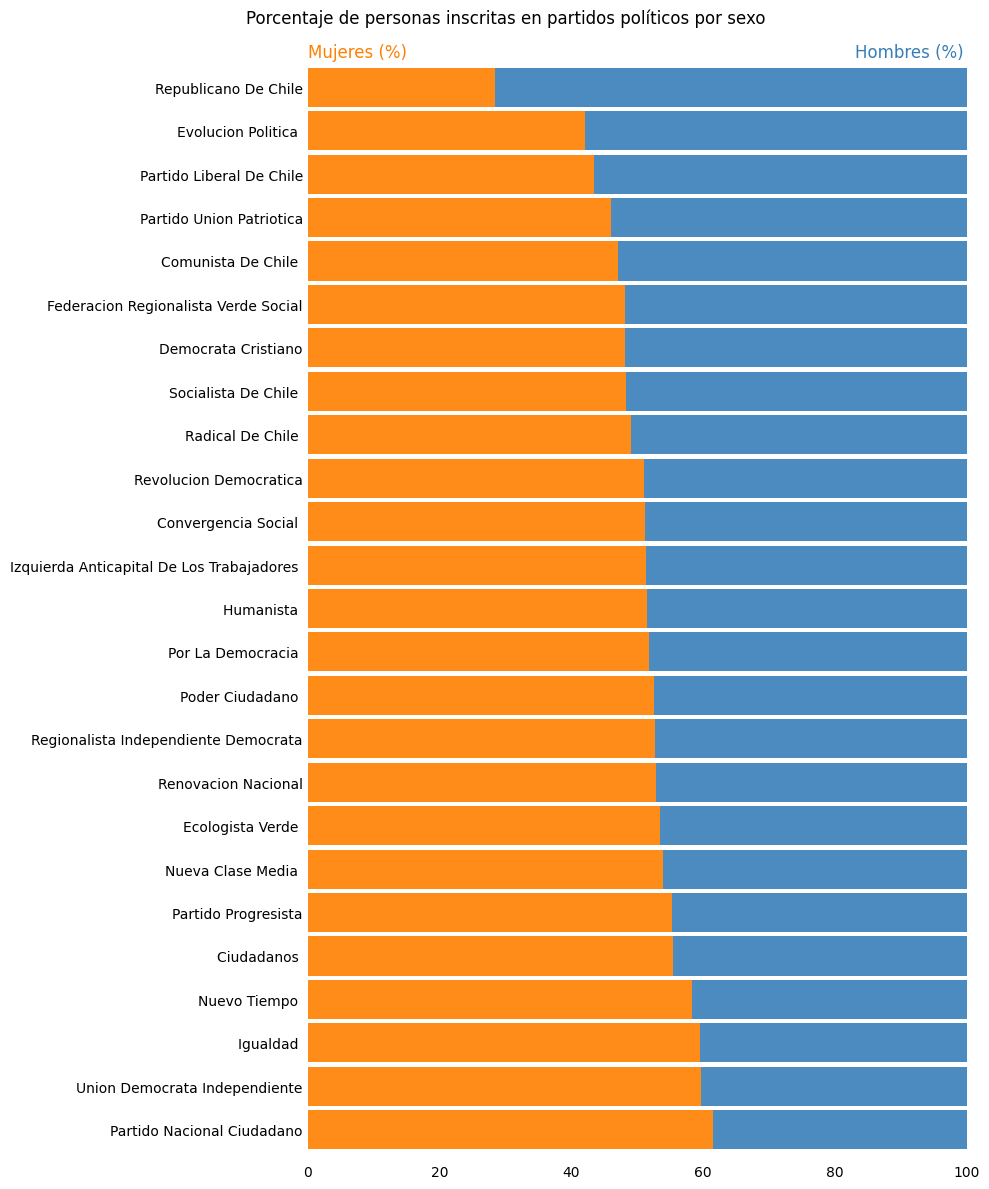

In [19]:
fontsize=12
colors = ['#ff7f00', '#377eb8']

ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100),
                                  color=colors)
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(83, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

plt.tight_layout()
plt.show()

Finalmente, resaltamos el título para que no se pierda entre el resto del gráfico.

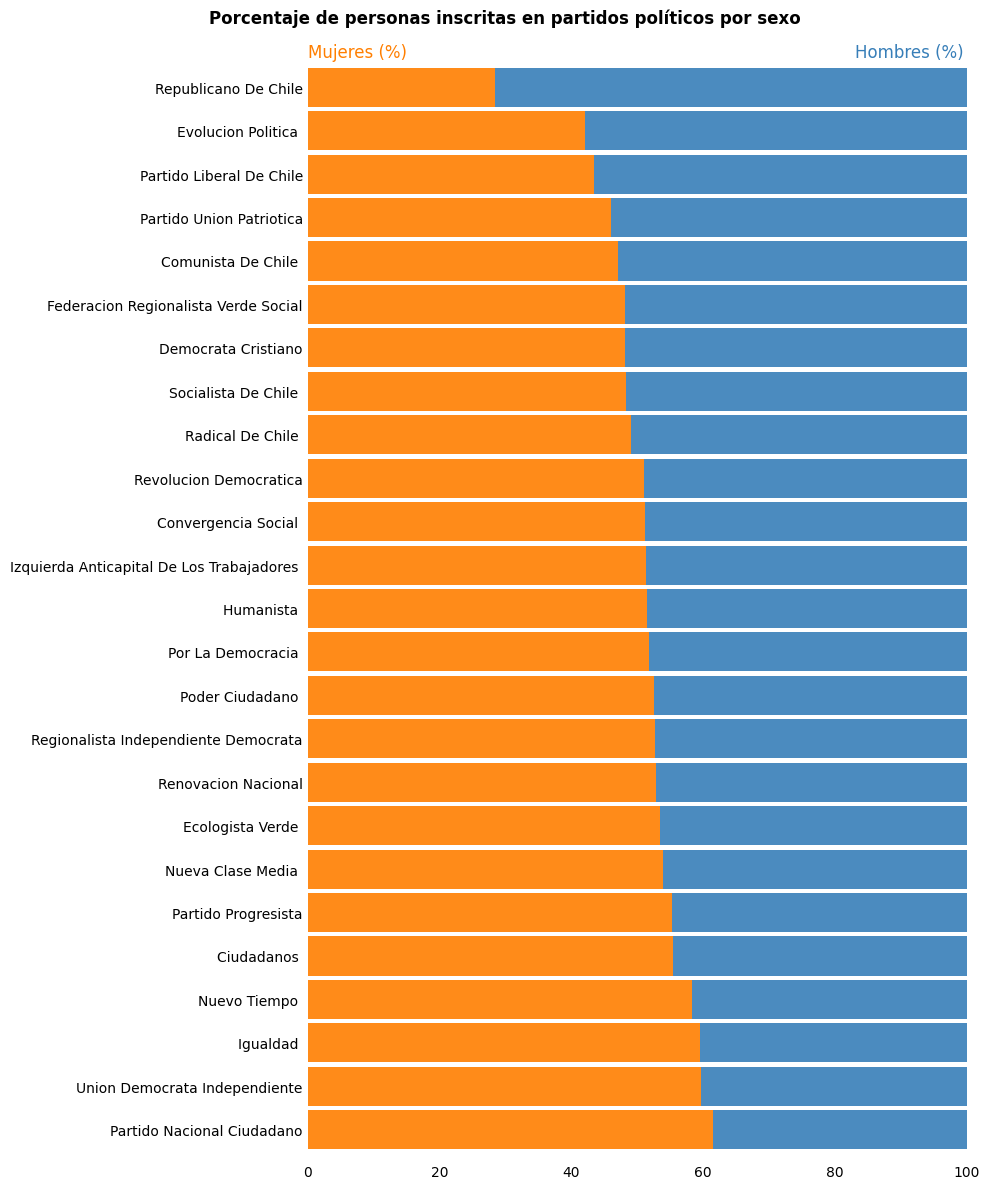

In [20]:
fontsize=12
colors = ['#ff7f00', '#377eb8']

ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100),
                                  color=colors)
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24, fontweight=700)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(83, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

plt.tight_layout()
plt.show()

Ahora agregamos los números de los porcentajes

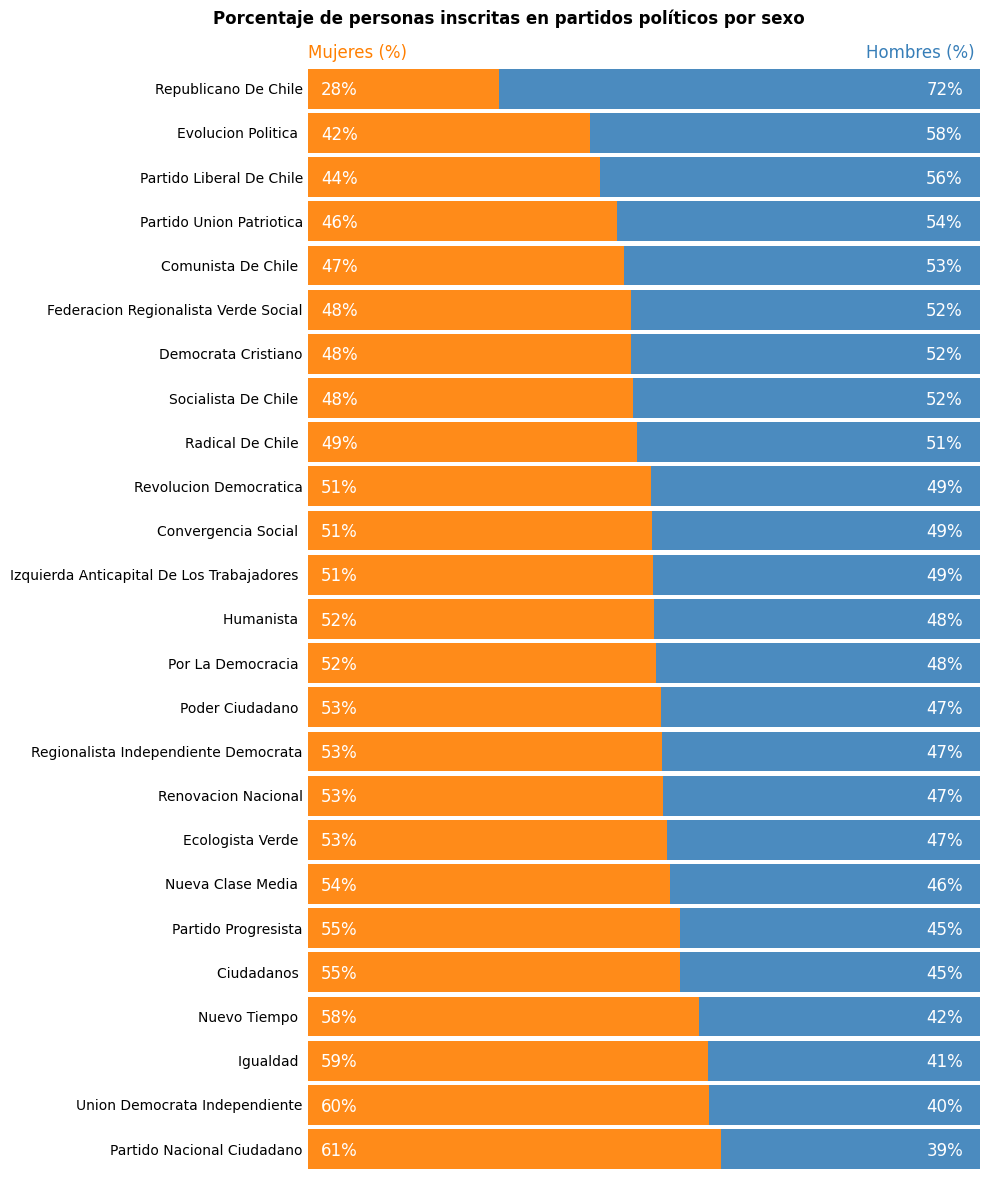

In [21]:
fontsize=12
colors = ['#ff7f00', '#377eb8']

ax = df_sorted[percents].plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100),
                                  color=colors)
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel("")
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24, fontweight=700)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(83, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

ax.xaxis.set_ticks([])

for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 92
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1]+0.3), color='white', fontsize=fontsize)

plt.tight_layout()
plt.show()

¿Cómo cambia el mensaje y la intención si le sacamos el color a las barras azules?

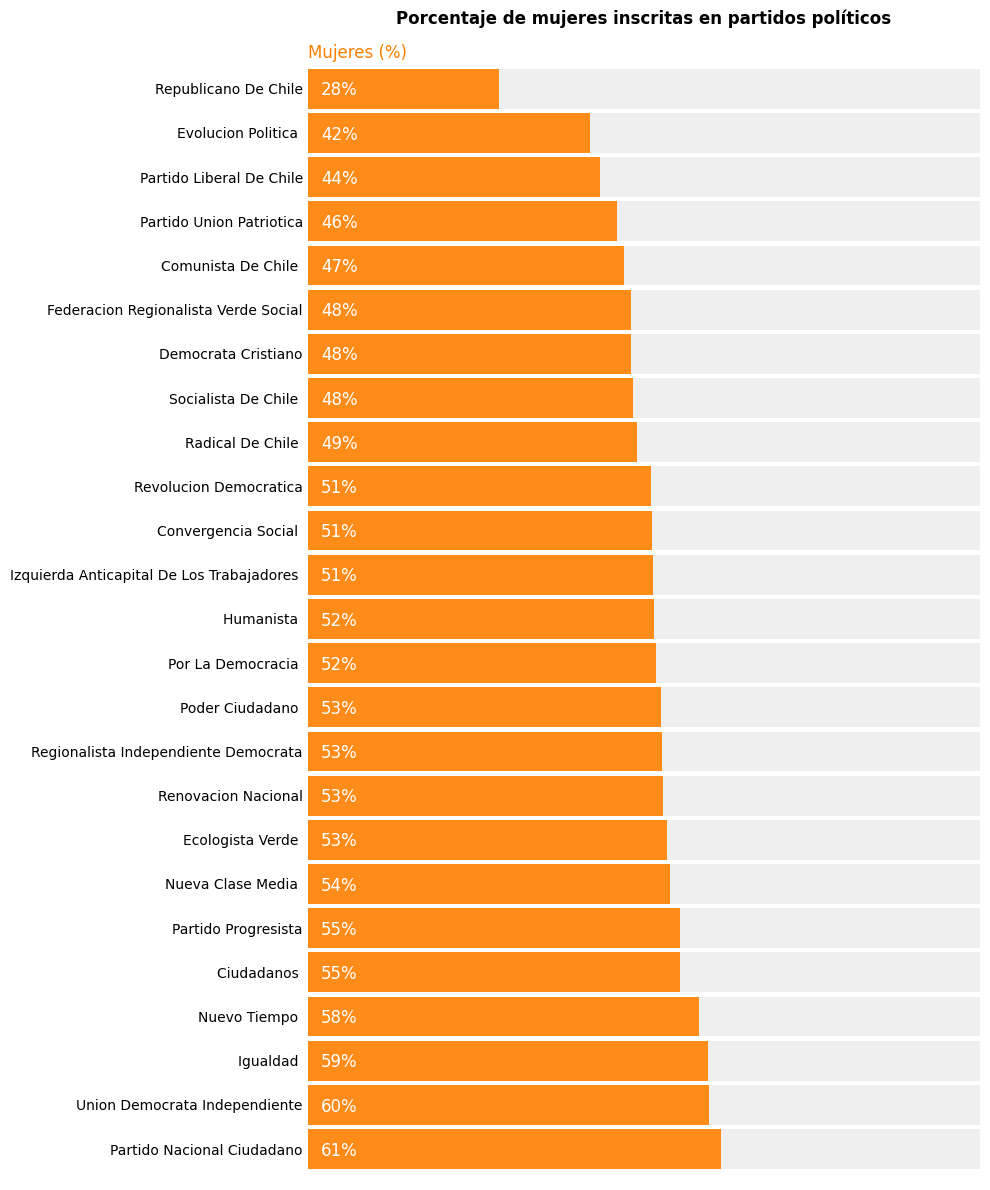

In [22]:
fontsize = 12
colors = ['#ff7f00', '#eee']

ax = df_sorted.plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9, alpha=0.9, xlim=(0,100),
                        color=colors)
hide_border(ax)
ax.set_ylabel("")
ax.set_title("Porcentaje de mujeres inscritas en partidos políticos", pad=24, fontweight=700)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)

ax.xaxis.set_ticks([])

for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
        ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1]+0.3), color='white', fontsize=fontsize)

plt.tight_layout()
plt.show()
plt.close()

## Ejemplo 2: Imitando a The Economist

Ahora la idea es imitar lo que más se pueda un gráfico publicado por The Economist. El objetivo de este ejercicio es que al final seamos capaz de agregar todos los elementos necesarios para que la vista final se parezca a la guía de estilo que usa aquella publicación


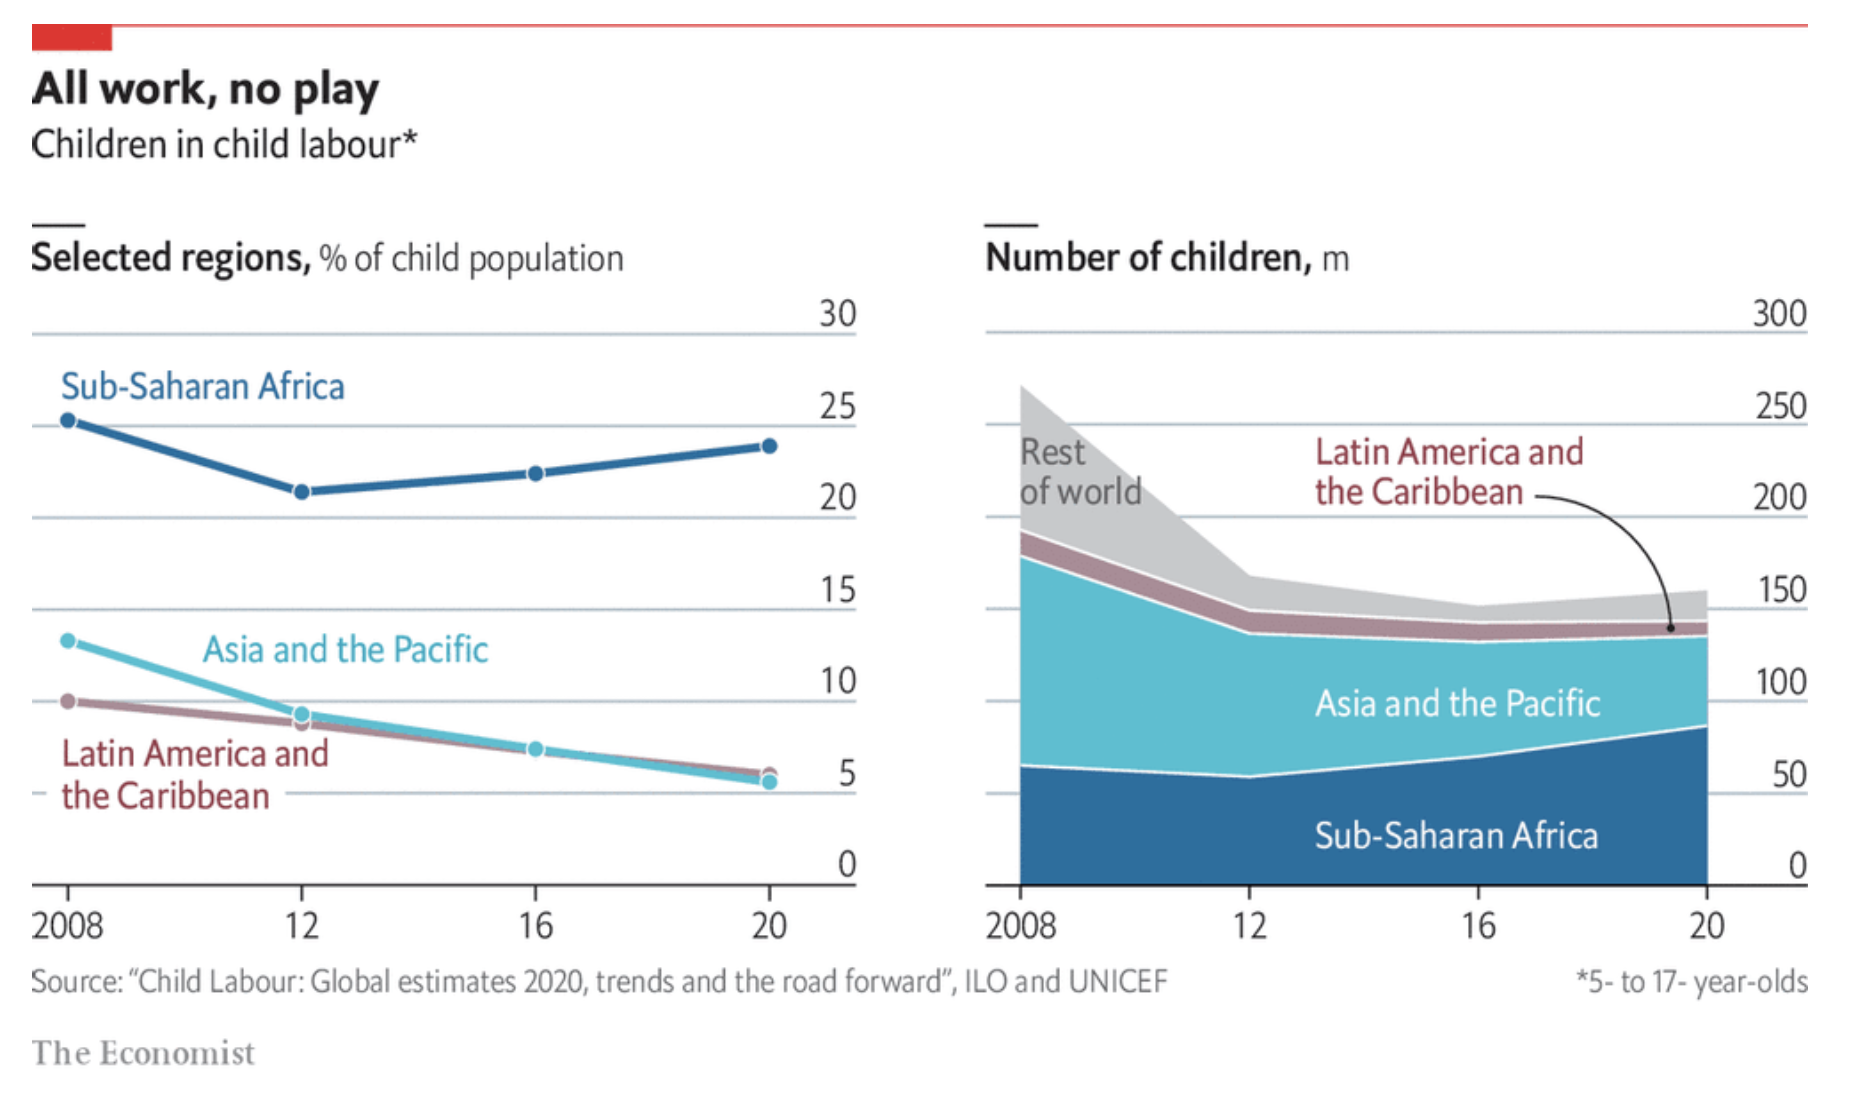

In [23]:
Image("./images/04-2-the-economist.png")

In [24]:
import matplotlib.font_manager
fpaths = matplotlib.font_manager.findSystemFonts()

for i in fpaths:
    f = matplotlib.font_manager.get_font(i)
    print(f.family_name)

Comic Sans MS
Bookshelf Symbol 7
Perpetua Titling MT
Lucida Bright
Bodoni MT
Sylfaen
Ebrima
Berlin Sans FB Demi
Candara
Microsoft Tai Le
Tahoma
Comic Sans MS
Copperplate Gothic Light
Lucida Console
Broadway
Mongolian Baiti
Dubai
Century Gothic
Eras Demi ITC
Microsoft Sans Serif
Nirmala UI
Gill Sans MT Condensed
Verdana
Arial
MS Gothic
Bell MT
ROG Fonts
Franklin Gothic Medium
Perpetua
Footlight MT Light
Britannic Bold
Forte
Californian FB
Gill Sans Ultra Bold Condensed
Edwardian Script ITC
Haettenschweiler
Georgia
Mistral
Courier New
High Tower Text
Roboto
Century
Monotype Corsiva
Kunstler Script
Dubai
MV Boli
Segoe Print
Georgia
Snap ITC
Leelawadee UI
Microsoft PhagsPa
Dubai
Microsoft YaHei
Microsoft Uighur
Cambria
Book Antiqua
Lucida Bright
Stencil
Goudy Old Style
Leelawadee
Gadugi
Bodoni MT
Niagara Solid
Berlin Sans FB
Baskerville Old Face
Yu Gothic
SimSun-ExtB
French Script MT
Segoe UI
Roboto
Harlow Solid Italic
Tw Cen MT Condensed
Perpetua
Arial
Arial
Tw Cen MT
Corbel
Curlz MT
Temp

In [25]:
#from matplotlib import font_manager as fm

# Ruta al archivo .ttf de la fuente Roboto
#roboto_path = "./Roboto/Roboto-Regular.ttf"

# Cargar la fuente directamente desde el archivo
#roboto_prop = fm.FontProperties(fname=roboto_path)
#plt.rcParams['font.family'] = roboto_prop.get_name()

Primero definimos los colores que usaremos. Para ello nos va a servir la herramienta que usamos la semana pasada: https://get-color.com/image/

In [26]:
GREY = "#c7c8ca"
BROWN = "#ad8b97"
TURQUOISE = "#2fc1d2"
BLUE = "#046ea1"
RED = "#ef1b24"

GREY_DARKER = "#676668"

### Line chart

Estos son los datos que graficaremos. Los sacamos al ojo desde la imagen original.

In [27]:
year = [2008, 2012, 2016, 2020]

latin_america = [10, 9, 7.5, 5.8]
asia_and_pacific = [13.5, 9.5, 7.5, 5.5]
sub_saharan_africa = [25.5, 21, 22.2, 24]
percentages = [sub_saharan_africa, asia_and_pacific, latin_america]

COLORS = [BLUE, TURQUOISE, BROWN]

Y hacemos un grafico de lineas simple

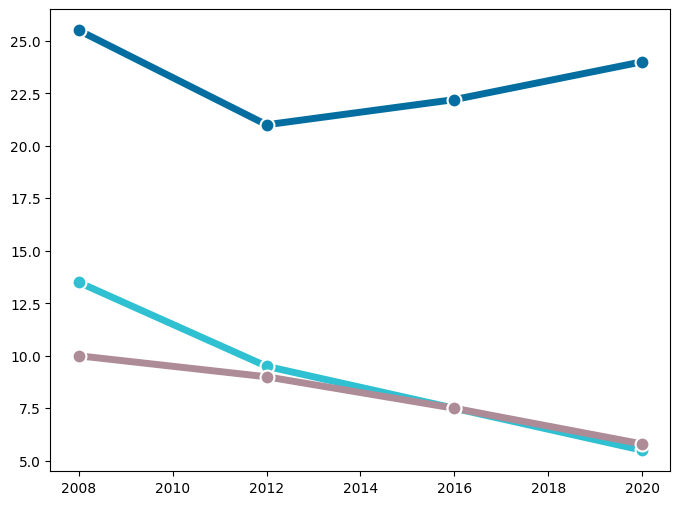

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

for percentage, color in zip(percentages, COLORS):
    ax.plot(year, percentage, color=color, lw=5)
    ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)
    

Comenzamos haciendole ajustes a los axes. Tanto el eje X como el Y necesitan ser modificados para cambiarle los tick labels, agregar grilla y borrar la caja que no usaremos. Primero ajustamos el eje Y.

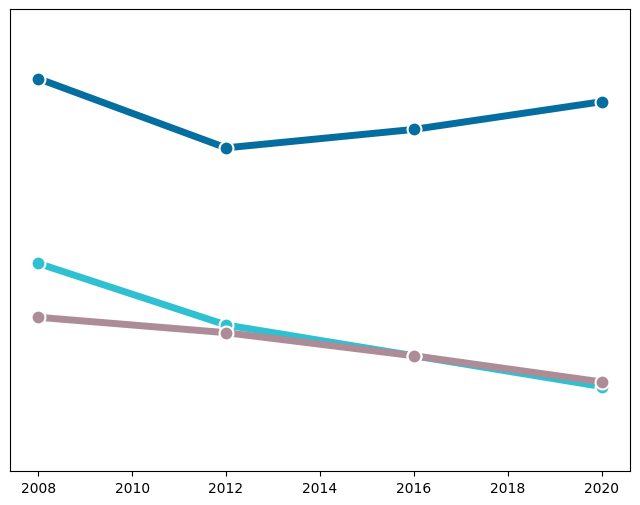

In [29]:
ax.yaxis.set_ticks([i * 5 for i in range(0, 7)])
ax.yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
ax.yaxis.set_tick_params(labelleft=False, length=0)

fig

Ahora ajustamos el eje X

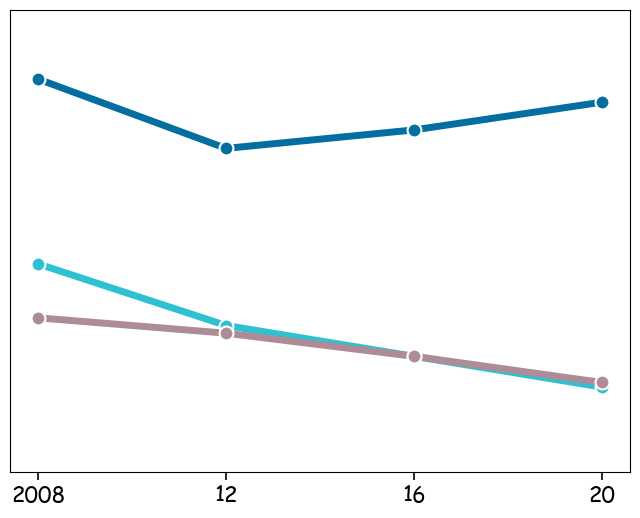

In [30]:
ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontfamily="Comic Sans MS", fontsize=16, fontweight=300)
#ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontweight=300)
ax.xaxis.set_tick_params(length=6, width=1.2)

# ax.set_axisbelow(True)

fig

Y agregamos la grilla para el eje Y

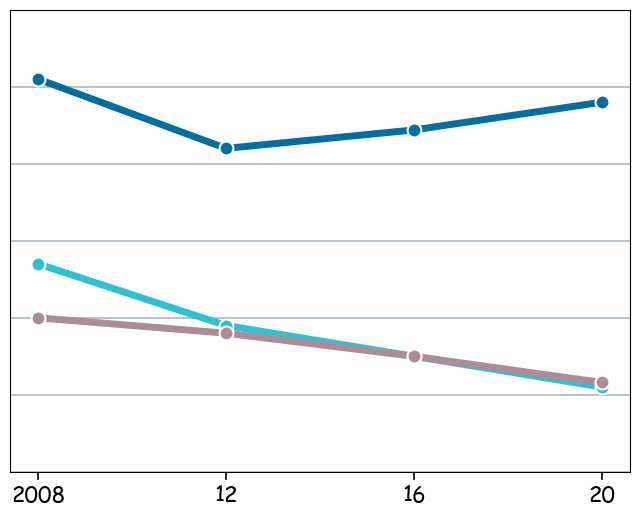

In [31]:
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

fig

Borramos la caja alrededor del gráfico dejando solo la que nos sirve

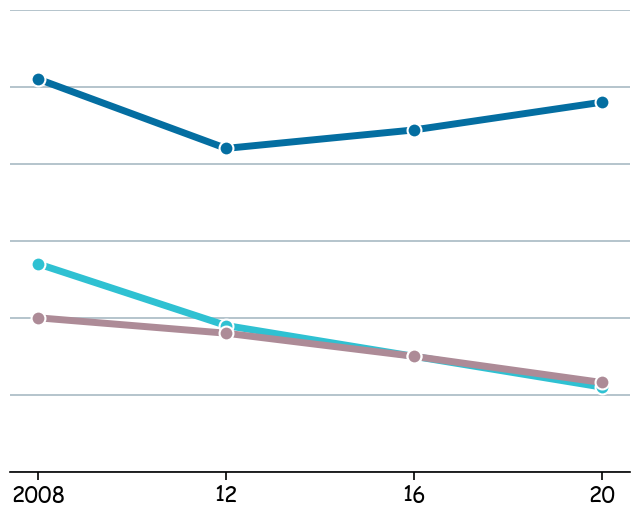

In [32]:
# Remove all spines but the one in the bottom
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set_lw(1.2)
# ax.spines["bottom"].set_capstyle("butt")

fig

Y cambiamos los límites de los ejes para dejar espacio para los labels del eje Y

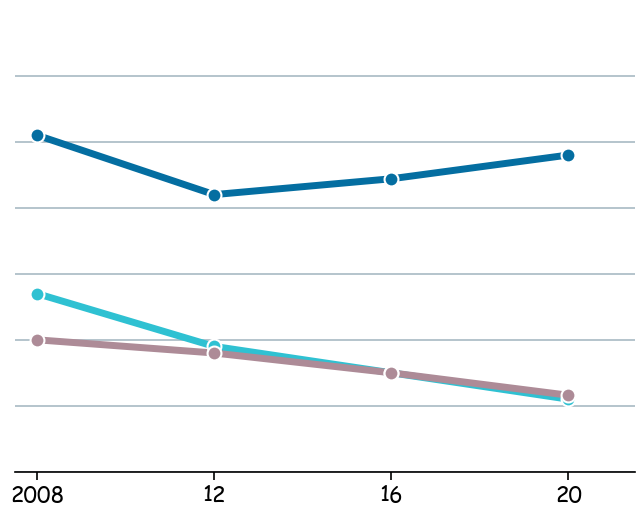

In [33]:
ax.set_ylim(0, 35)
ax.set_xlim(2007.5, 2021.5)

fig

Agregamos los labels del eje Y como `ax.text`

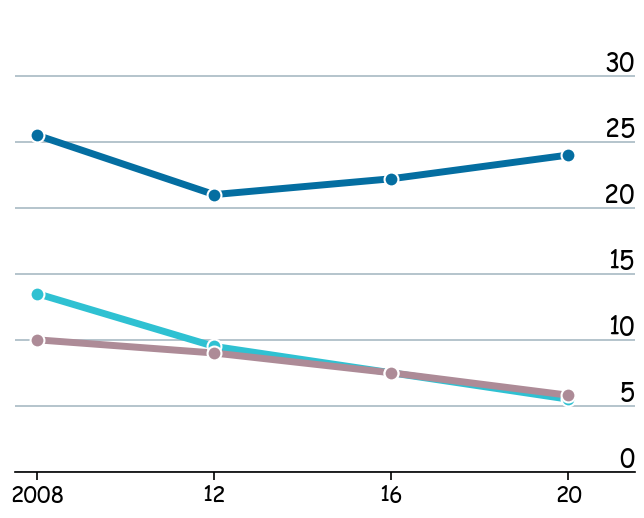

In [34]:
PAD = 35 * 0.01
for label in [i * 5 for i in range(0, 7)]:
    ax.text(
        2021.5, label + PAD, label, 
        fontfamily="Comic Sans MS",
        ha="right", va="baseline", fontsize=18, fontweight=300
    )
    
fig

Agregamos los labels de cada línea dentro del mismo gráfico 

In [35]:
# def add_region_label(x, y, text, color, ax):
#     ax.text(
#         x, y, text, color=color, fontsize=18, 
#         va="center", ha="left"
#     ) 
    
    
# region_labels = [
#     {
#         "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
#         "color": BROWN},
#     {
#         "x": 2010, "y": 13, "text": "Asia and the Pacific", 
#         "color": TURQUOISE,
#     },
#     {
#         "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
#         "color": BLUE,
#     },
# ]    

# for label in region_labels:
#     add_region_label(**label, ax=ax)

# fig

El problema de esos labels es que el de América Latina se ve cruzado por una de las rayas de la grilla. Para corregir eso le podemos agregar un fondo blanco, lo que se hace de la siguiente forma

In [36]:
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

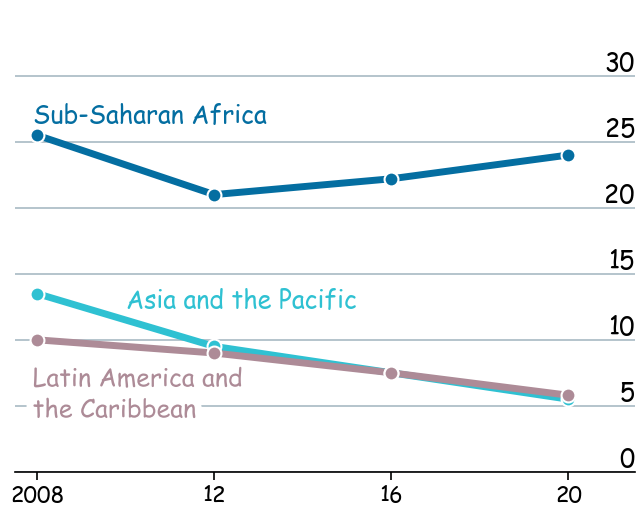

In [37]:
def add_region_label(x, y, text, color, path_effects, ax):
    ax.text(
        x, y, text, color=color, fontsize=18, 
        fontfamily="Comic Sans MS", fontweight=400,
        va="center", ha="left", path_effects=path_effects
    ) 
    
path_effects = [withStroke(linewidth=10, foreground="white")]

region_labels = [
    {
        "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
        "color": BROWN, "path_effects": path_effects
    },
    {
        "x": 2010, "y": 13, "text": "Asia and the Pacific", 
        "color": TURQUOISE, "path_effects": []
    },
    {
        "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
        "color": BLUE, "path_effects": []
    },
]    

for label in region_labels:
    add_region_label(**label, ax=ax)

fig

Ahora que el gráfico ya se ve lo suficientemente parecido, es momento de agregar el título. Para ello ocuparemos una variante de `ax.text` llamada `flexitext` la cual permita variar la fuente y estilo del texto dentro de un mismo `string`

In [38]:
from flexitext import flexitext

In [39]:
text = "<name:Comic Sans MS, size:18><weight:bold>Selected regions,</> % of child population</>"
flexitext(0, 0.975, text, va="top", ax=ax)

Y ahora agregamos la pequeña línea que va arriba del título

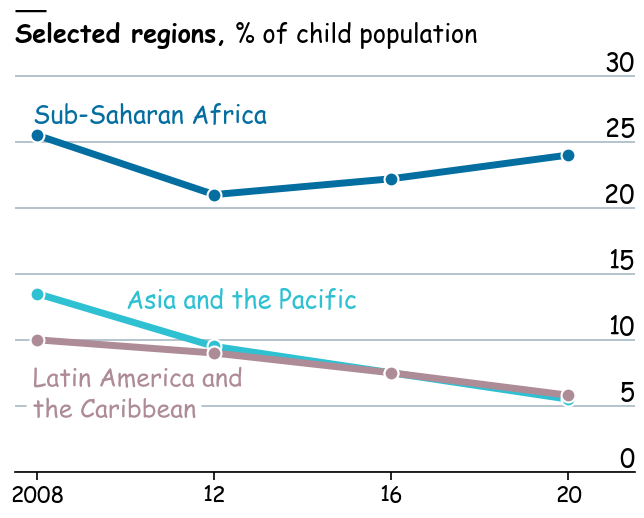

In [40]:
ax.add_artist(
    lines.Line2D(
        [0, 0.05], [1, 1], lw=2.5, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)
fig

Ahora crearemos una función `plot_line_chart` con todo nuestro código ya que la usaremos después 

In [41]:
def plot_line_chart(ax):
    year = [2008, 2012, 2016, 2020]

    latin_america = [10, 9, 7.5, 5.8]
    asia_and_pacific = [13.5, 9.5, 7.5, 5.5]
    sub_saharan_africa = [25.5, 21, 22.2, 24]
    percentages = [sub_saharan_africa, asia_and_pacific, latin_america]

    COLORS = [BLUE, TURQUOISE, BROWN]
    
    for percentage, color in zip(percentages, COLORS):
        ax.plot(year, percentage, color=color, lw=5)
        ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)
        
    # y-axis
    ax.yaxis.set_ticks([i * 5 for i in range(0, 7)])
    ax.yaxis.set_ticklabels([i * 5 for i in range(0, 7)])
    ax.yaxis.set_tick_params(labelleft=False, length=0)

    # x-axis 
    ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
    ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontfamily="Roboto", fontsize=16, fontweight=300)
    ax.xaxis.set_tick_params(length=6, width=1.2)

    ax.set_axisbelow(True)

    # Add grid lines
    ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

    # Remove all spines but the one in the bottom
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Customize bottom spine
    ax.spines["bottom"].set_lw(1.2)
    ax.spines["bottom"].set_capstyle("butt")

    # Set custom limits
    ax.set_ylim(0, 35)
    ax.set_xlim(2007.5, 2021.5)
    
    PAD = 35 * 0.01
    for label in [i * 5 for i in range(0, 7)]:
        ax.text(
            2021.5, label + PAD, label, 
            fontfamily="Comic Sans MS",
            ha="right", va="baseline", fontsize=18, fontweight=300
        )
        
    path_effects = [withStroke(linewidth=10, foreground="white")]

    region_labels = [
        {
            "x": 2007.9, "y": 5.8, "text": "Latin America and\nthe Caribbean", 
            "color": BROWN, "path_effects": path_effects
        },
        {
            "x": 2010, "y": 13, "text": "Asia and the Pacific", 
            "color": TURQUOISE, "path_effects": []
        },
        {
            "x": 2007.9, "y": 27, "text": "Sub-Saharan Africa", 
            "color": BLUE, "path_effects": []
        },
    ]    

    for label in region_labels:
        add_region_label(**label, ax=ax)


    text = "<name:Comic Sans MS, size:18><weight:bold>Selected regions,</> % of child population</>"
    flexitext(0, 0.975, text, va="top", ax=ax)

    # This is the small line on top of the title
    # Note the 'solid_capstyle' and the 'transform', these are very important.
    ax.add_artist(
        lines.Line2D(
            [0, 0.05], [1, 1], lw=2.5, color="black",
            solid_capstyle="butt", transform=ax.transAxes
        )
    )

### Ejercicio: Stacked area chart

Siguiendo el ejemplo usado, crear una función `plot_area_chart` que genere el stacked area chart de la derecha.

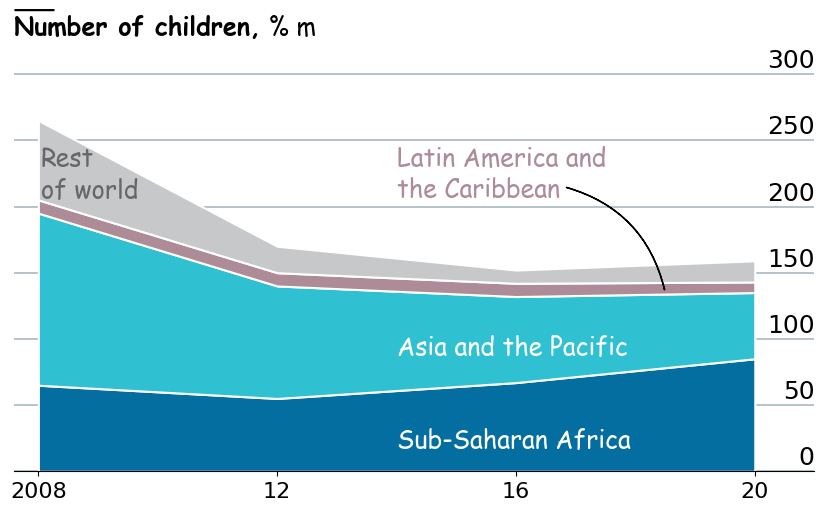

In [125]:
def plot_area_chart(ax):
    
    COLORS = [BLUE, TURQUOISE, BROWN, GREY]

    counts = [
        [65, 55, 67, 85],
        [130, 85, 65, 50],
        [10, 10, 10, 8],
        [60, 20, 10, 16]

    ]

    ax.stackplot(year, counts, colors=COLORS, lw=1.5, edgecolor='white');

    ax.yaxis.set_tick_params(labelleft=False, length=0)

    ax.xaxis.set_ticks([2008, 2012, 2016, 2020])
    ax.xaxis.set_ticklabels([2008, 12, 16, 20], fontsize=16, fontweight=100)

    ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
    ax.set_axisbelow(True)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    regiones = [
    {"x": 2014, "y": 224, "text": "Latin America and\nthe Caribbean", "color": BROWN, "path_effects":[]},
    {"x": 2014, "y": 94, "text": "Asia and the Pacific", "color": "white", "path_effects":[]},
    {"x": 2014, "y": 24, "text": "Sub-Saharan Africa", "color": "white", "path_effects":[]},
    {"x": 2008.04, "y": 224, "text": "Rest\nof world", "color": GREY_DARKER, "path_effects":[]},
    ]    

    text_ax = lambda x: ax.text(2021, x+5, x, ha="right", va="baseline", fontsize=18, fontweight=100)
    ax.set_ylim(0, 349)
    ax.set_xlim(2007.6, 2021)
    for label in [i * 50 for i in range(0, 7)]: text_ax(label)
    for label in regiones: add_region_label(**label, ax=ax)

    text = "<name:Comic Sans MS, size:18><weight:bold>Number of children,</> % m</>"
    flexitext(0, 0.99, text, va="top", ax=ax)

    aaa = 1

    ax.add_artist(
        lines.Line2D(
            [0, 0.05], [aaa, aaa], lw=2.5, color="black",
            solid_capstyle="butt", transform=ax.transAxes
        )
    )

    ax.add_artist(
        patches.FancyArrowPatch(
            (2016.8, 215), (2018.5, 135),
            connectionstyle="arc3, rad=-0.3",
            hatch='O'
        )
    )


fig, axes = plt.subplots(1, 1, figsize=(8, 6))
fig.subplots_adjust(left=0, right=1)

fig.set_facecolor("w")

plot_area_chart(axes)

### Juntando ambos gráficos

Ahora que ya tenemos el line chart de la izquierda y el stacked area chart de la derecha es necesario juntarlos en una única figura. Para eso ocuparemos `plt.subplots`.

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


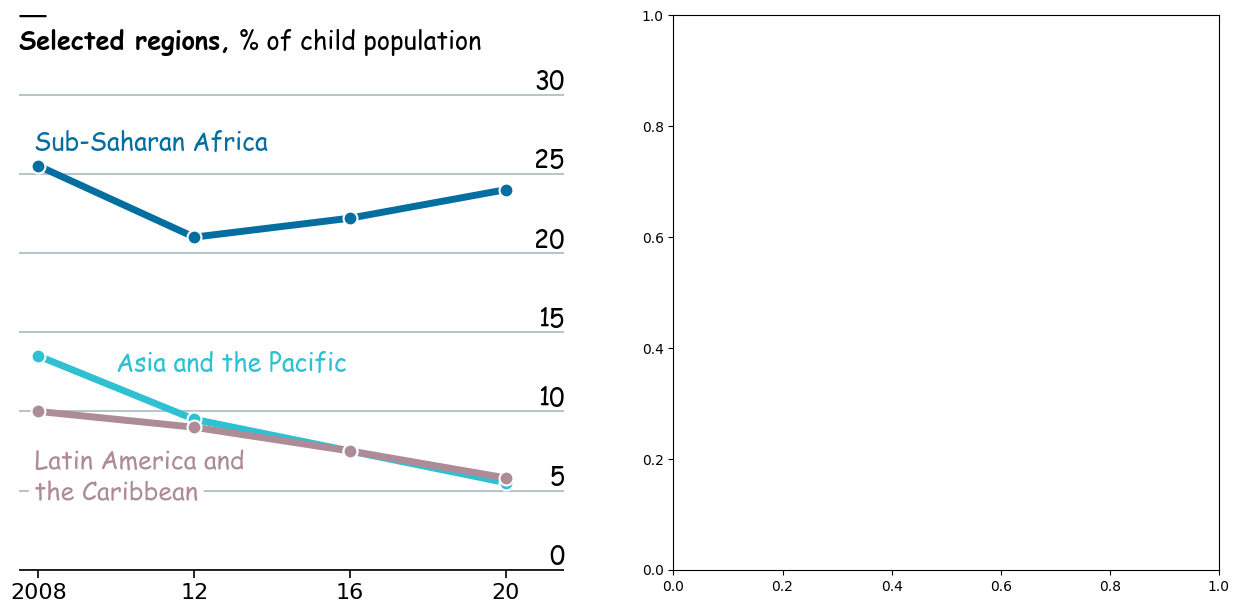

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7.2))
fig.subplots_adjust(left=0, right=1)

fig.set_facecolor("w")

plot_line_chart(axes[0])
plot_area_chart(axes[1])


Y ajustamos de a poco cada uno de los elementos que aún nos faltan, partiendo por el título.

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


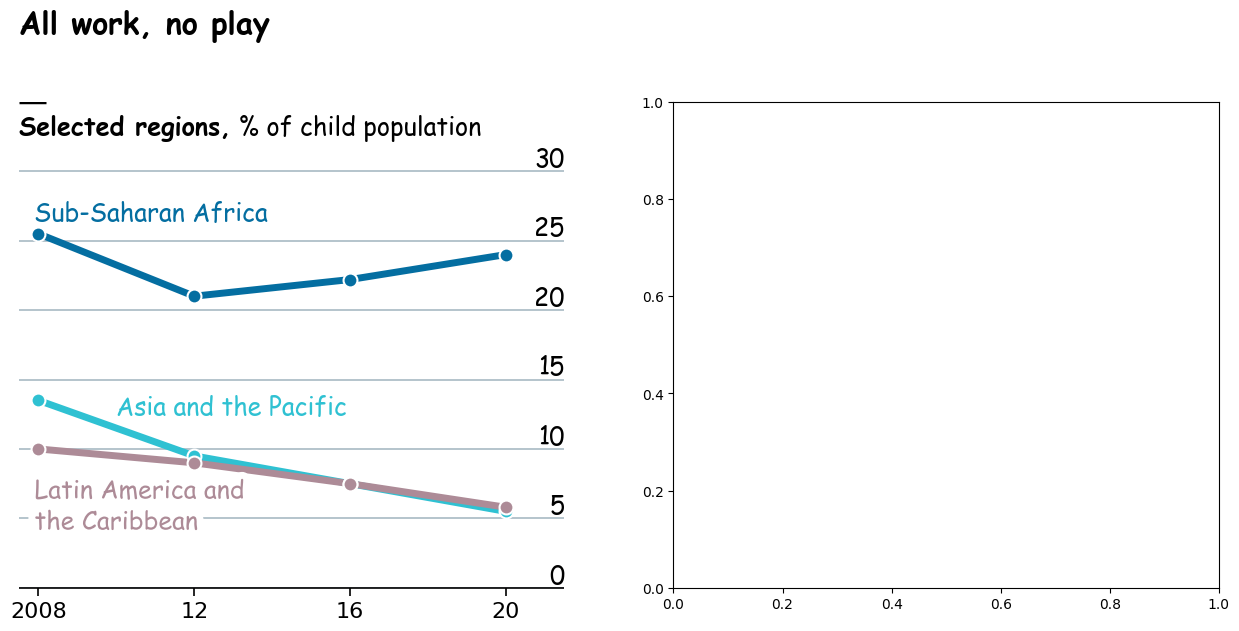

In [43]:
fig.subplots_adjust(top=0.825, bottom=0.15)

fig.text(
    0, 0.92, "All work, no play", 
    fontsize=22,
    fontweight="bold", 
    fontfamily="Comic Sans MS"
)

fig

El subtítulo

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


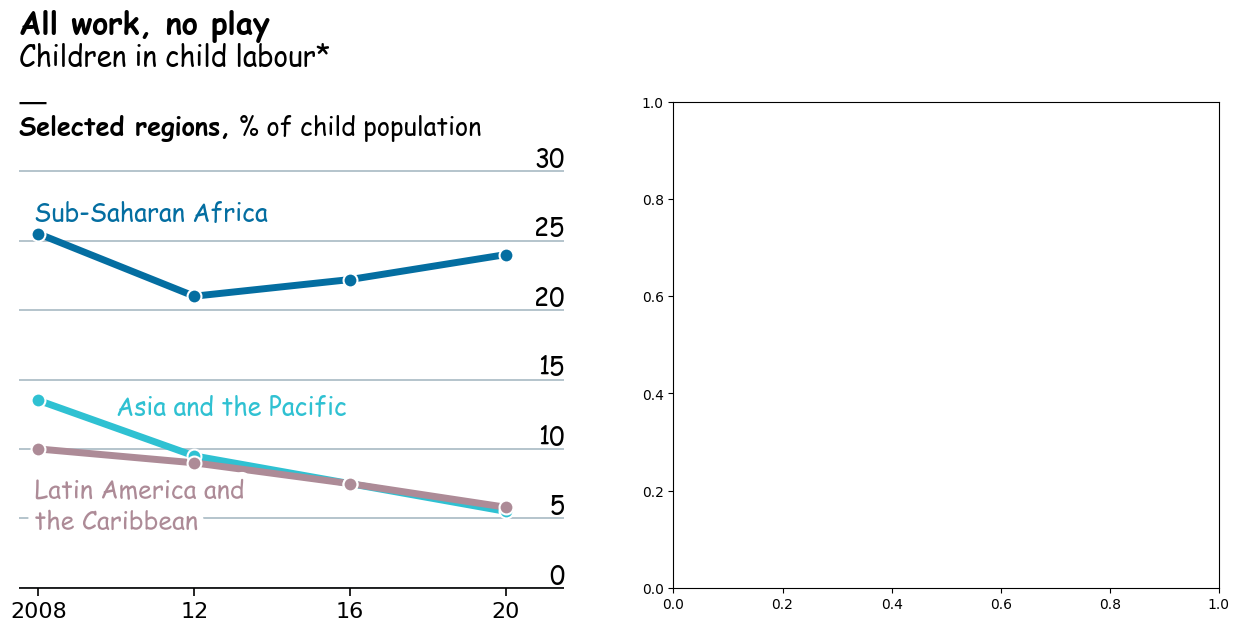

In [44]:
fig.text(
    0, 0.875, "Children in child labour*", 
    fontsize=20, 
    fontfamily="Comic Sans MS"
)

fig

La fuente

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


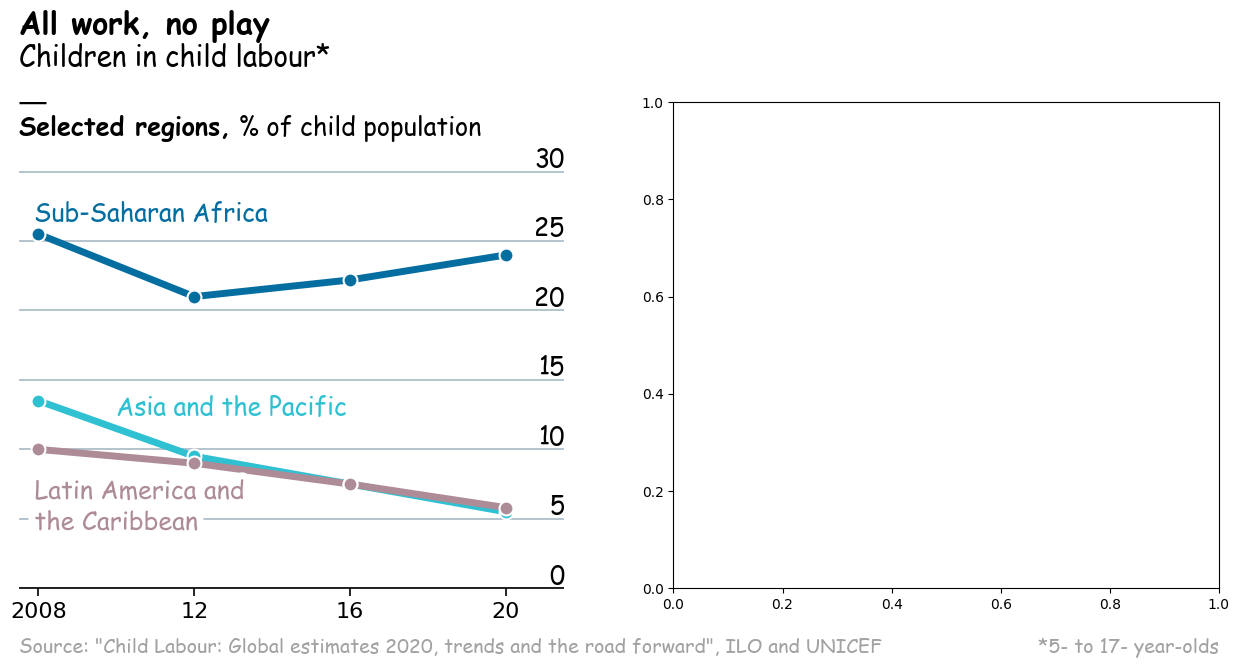

In [45]:
source = 'Source: "Child Labour: Global estimates 2020, trends and the road forward", ILO and UNICEF'
fig.text(
    0, 0.06, source, color="#a2a2a2", 
    fontsize=14, fontfamily="Comic Sans MS"
)
fig.text(
    1, 0.06, "*5- to 17- year-olds", color="#a2a2a2", ha="right",
    fontsize=14, fontfamily="Comic Sans MS"
)

fig

La autoría.

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


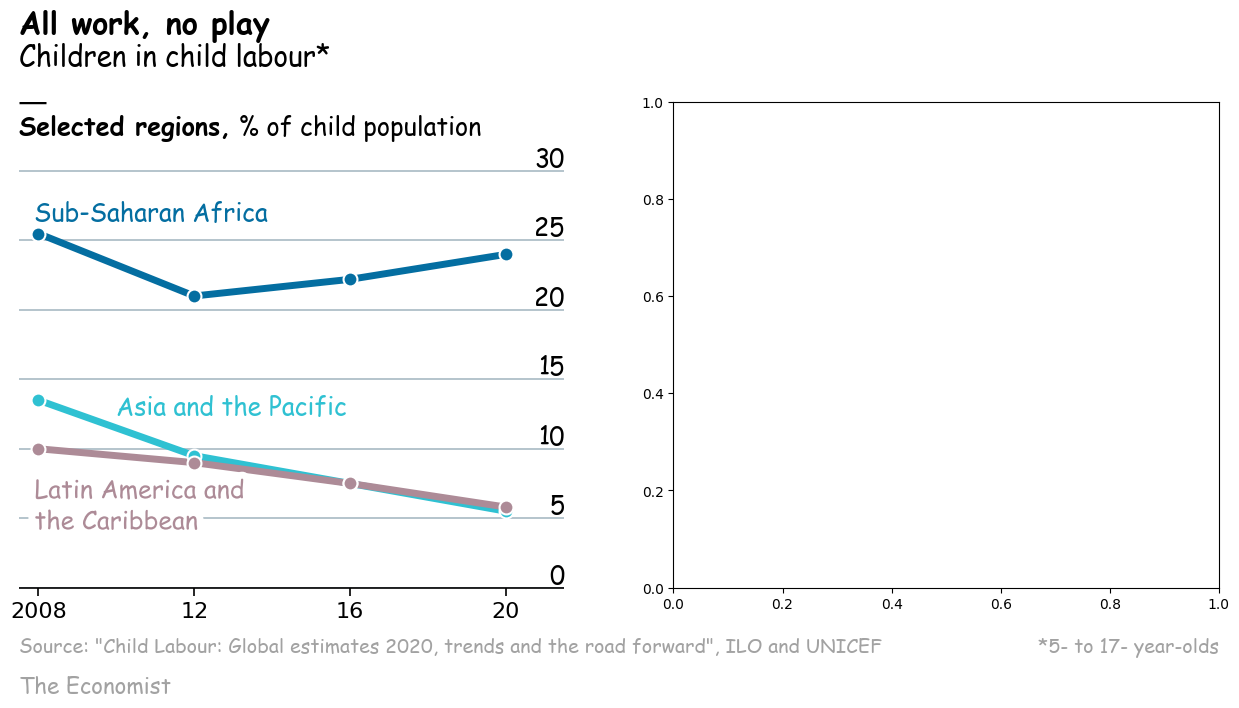

In [46]:
fig.text(
    0, 0.005, "The Economist", color="#a2a2a2",
    fontsize=16, fontfamily="Comic Sans MS"
)

fig

Y la decoración roja de arriba del gráfico.

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


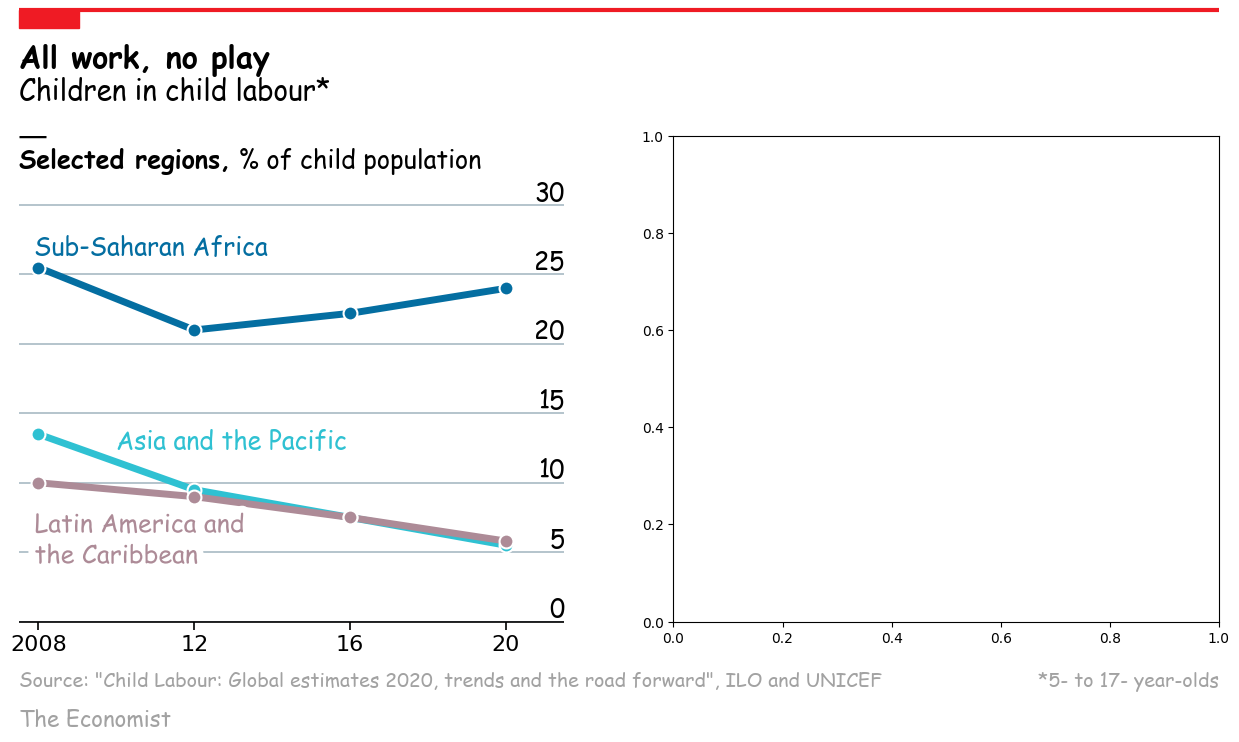

In [47]:
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

fig

### Nota

El segundo ejemplo fue sacado de [esta página web](https://python-graph-gallery.com/best-python-chart-examples/). Si quieren practicar más pueden ver otros tutoriales incluidos en la misma página.